## HOMEWORK 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING

### 1. Metadata  
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

-**Age** (numeric)

-**Sex** (text: male, female)

-**Job** (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

-**Housing** (text: own, rent, or free)

-**Saving accounts** (text - little, moderate, quite rich, rich)

-**Checking account** (numeric, in DM - Deutsch Mark)

-**Credit amount** (numeric, in DM)

-**Duration** (numeric, in month)

-**Purpose** (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

### 2. Load Dataset

In [2]:
dataset = pd.read_csv("german_credit_data.csv", sep = ",", skipinitialspace=True)
dataset = dataset.drop(dataset.columns[0], axis = 1) #in dataset we have extra column with row order 
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [3]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  1000
#Features =  9


In [4]:
# checking the missing values
dataset[dataset.isna().any(axis=1)]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
8,61,male,1,own,rich,NaN,3059,12,radio/TV
...,...,...,...,...,...,...,...,...,...
991,34,male,1,own,moderate,NaN,1569,15,radio/TV
992,23,male,1,rent,NaN,little,1936,18,radio/TV
994,50,male,2,own,NaN,NaN,2390,12,car
995,31,female,1,own,little,NaN,1736,12,furniture/equipment


We have missing data (NaN). Let's see that with plot:

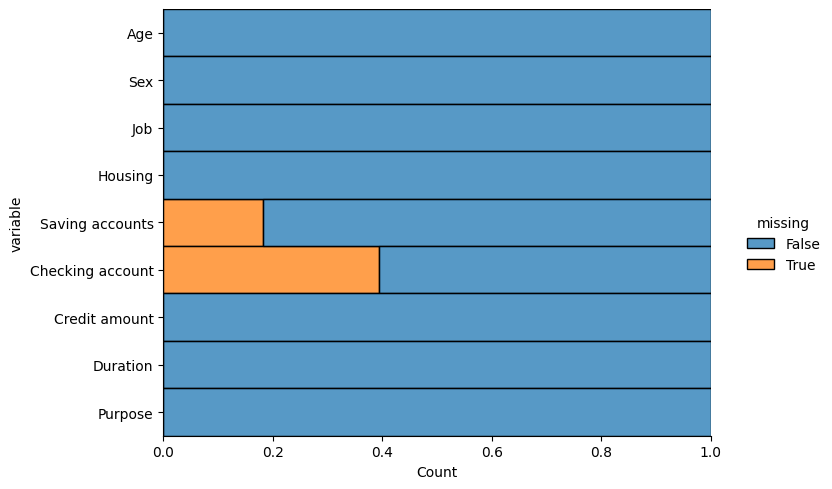

In [5]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [6]:
dataset_dropna = dataset.dropna()
print("#We drop almost half of dataset:", (1-len(dataset_dropna)/len(dataset))*100, "%")
print("I don't like it")

#We drop almost half of dataset: 47.8 %
I don't like it


In [7]:
# fill in the gaps with the most frequent values in the columns
col_with_NaN = ['Saving accounts', 'Checking account']
for col in col_with_NaN:
    # Get the most frequent element and its count
    most_frequent = dataset[col].value_counts().idxmax()
    count = dataset[col].value_counts().max()
    # Print the results
    print(f"{col}: The most common element - {most_frequent}, Amount - {count} from {dataset.shape[0]-dataset[col].isna().sum()} not NaN")
    dataset[col].fillna(most_frequent, inplace=True)
print("The gaps in the dataset are filled with the most frequent values in the columns:\n")
dataset

Saving accounts: The most common element - little, Amount - 603 from 817 not NaN
Checking account: The most common element - little, Amount - 274 from 606 not NaN
The gaps in the dataset are filled with the most frequent values in the columns:



C:\Users\Дарья\AppData\Local\Temp\ipykernel_13788\2526854046.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(most_frequent, inplace=True)
C:\Users\Дарья\AppData\Local\Temp\ipykernel_13788\2526854046.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,little,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


### 3. Descriptive Statistical Analysis

* Numerical variables

In [9]:
# list of numerical variables 
numerical_cols = ["Age", "Credit amount", "Duration"]

Histogram

In [10]:
# function to plot distribution for 1 numerical column
def variable_distribution(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

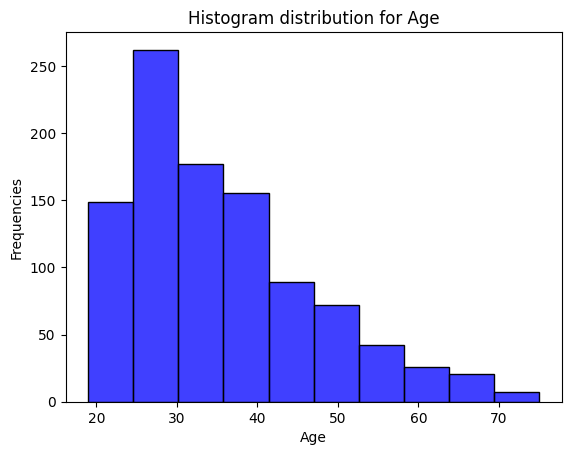

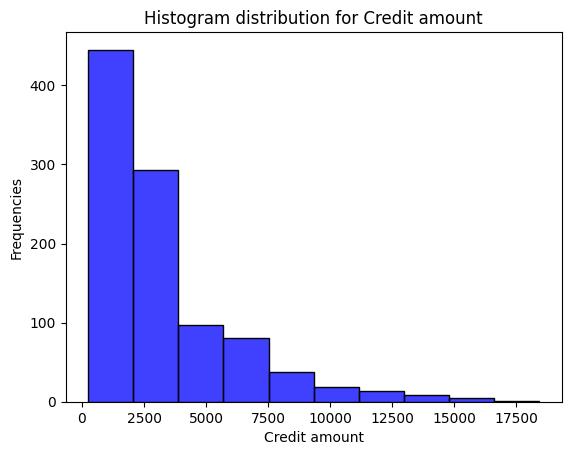

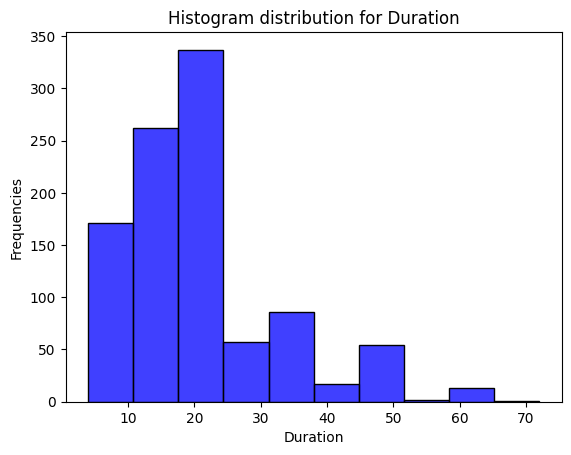

In [11]:
# plot the distribution for each numerical column
for col in numerical_cols:
    variable_distribution(dataset, col, 10)

**The histogram visually summarizes the distribution of data points across different intervals of the specified column.**

In [19]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

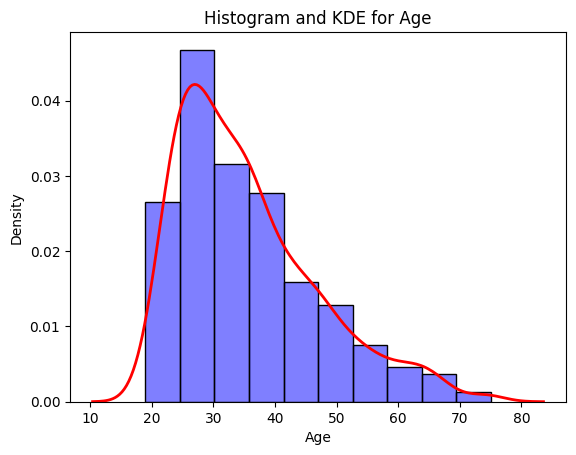

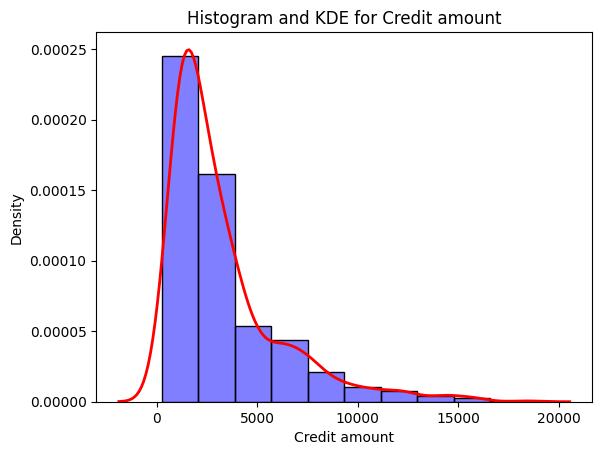

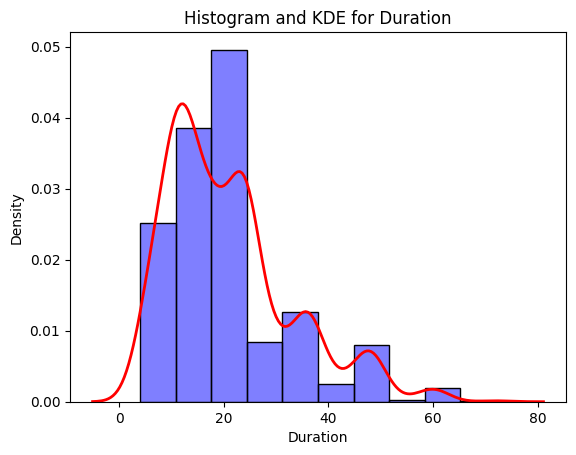

In [22]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

**Histogram with a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable.**

Box Plot

In [12]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    fig, axs = plt.subplots(1, len(numerical_cols), figsize = (16, 4))
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

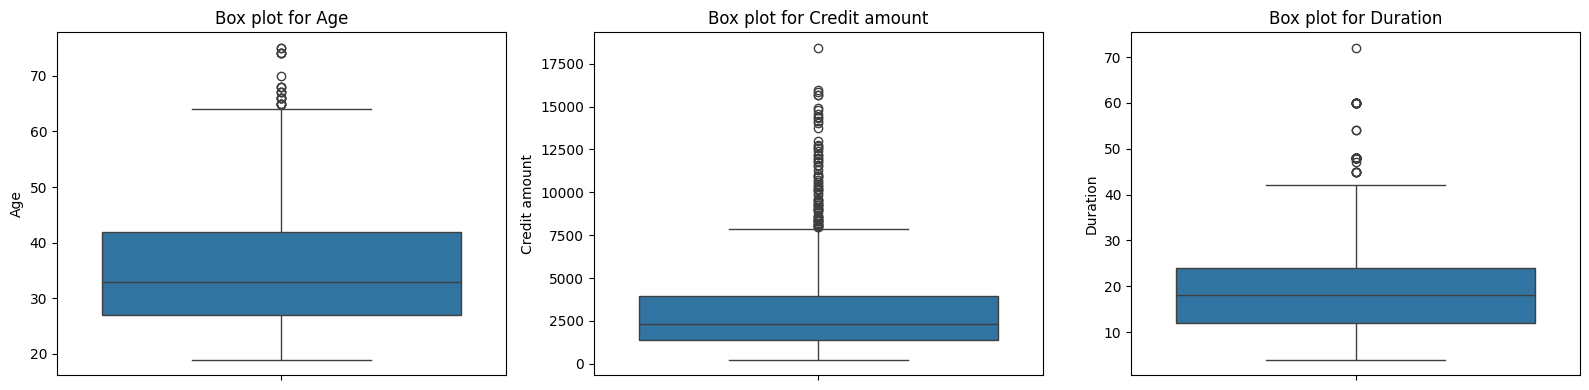

In [13]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

**The box plot helps in visualizing the central tendency (median), data spread (IQR), and the presence of outliers in each numerical column.**

Statistical metrics

In [24]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [27]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
     # Calculate the correlation matrix
    corr = data[cols].corr()

    # Create a heatmap using Seaborn
    plt.figure(figsize=(10, 10))
    sbn.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={"shrink": 0.8})

    # Set title and labels
    plt.title("Correlation Heatmap")
    plt.xlabel("Variables")
    plt.ylabel("Variables")

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha="right")

    # Display the heatmap
    plt.show()

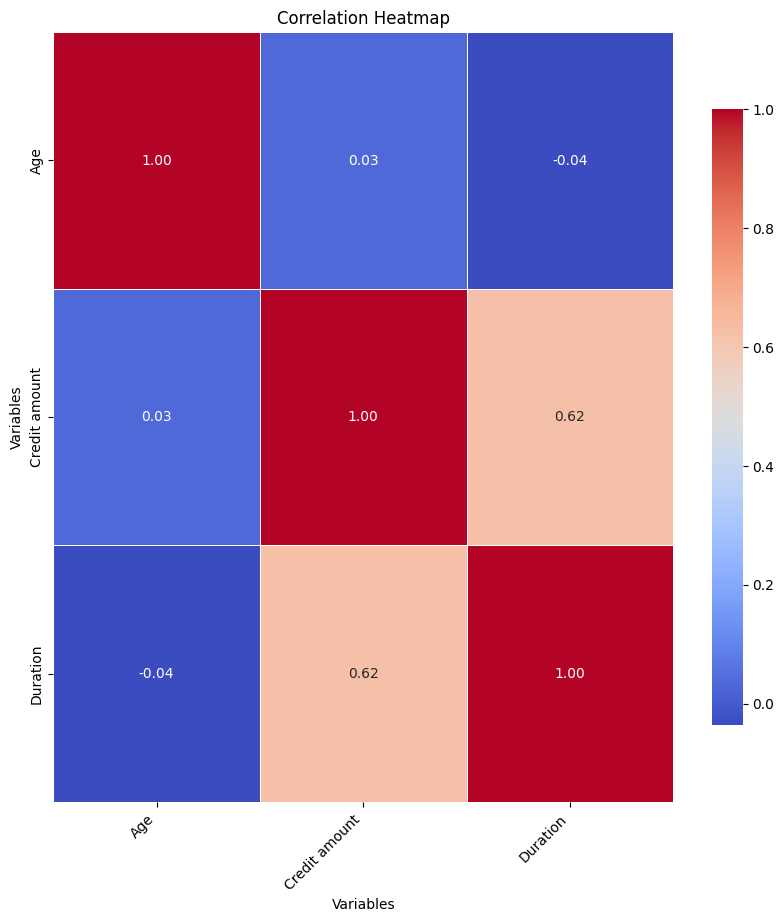

In [28]:
plot_correlation(dataset, numerical_cols)

**The values inside each cell represent the Pearson correlation coefficient, ranging from -1 (strong negative correlation) to +1 (strong positive correlation), with 0 indicating no correlation.**

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

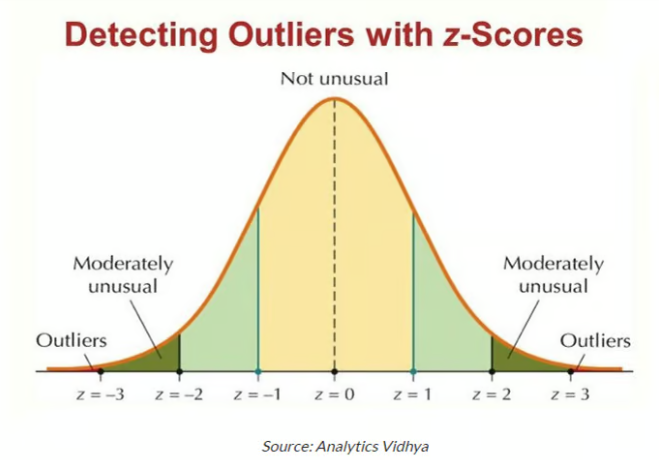

In [29]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [33]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Age ***
#samples outlier to distribution = 39
%outliers = 3.9 %

*** Outliers detection in Credit amount ***
#samples outlier to distribution = 46
%outliers = 4.6 %

*** Outliers detection in Duration ***
#samples outlier to distribution = 23
%outliers = 2.3 %


* Categorical Variables

In [35]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['Checking account', 'Purpose', 'Saving accounts', 'Housing', 'Sex', 'Job']

Count instances for each categorical column

In [36]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** Checking account ******
Checking account
little      668
moderate    269
rich         63
Name: count, dtype: int64

***** Purpose ******
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

***** Saving accounts ******
Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

***** Housing ******
Housing
own     713
rent    179
free    108
Name: count, dtype: int64

***** Sex ******
Sex
male      690
female    310
Name: count, dtype: int64

***** Job ******
Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64


Bar chart for categorical variables

In [38]:
# function to plot distribution for 1 categorical column
def plot_count_categories(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

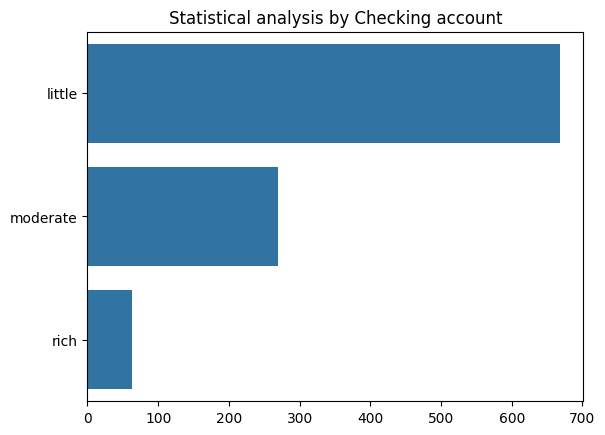

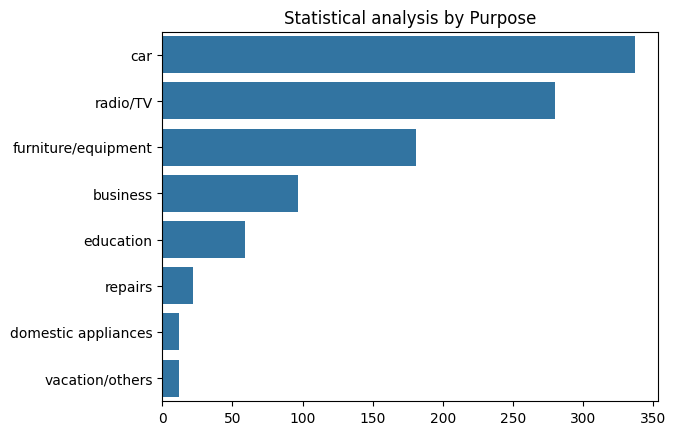

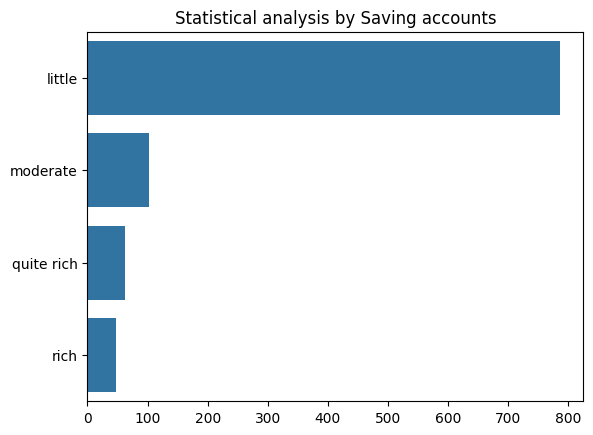

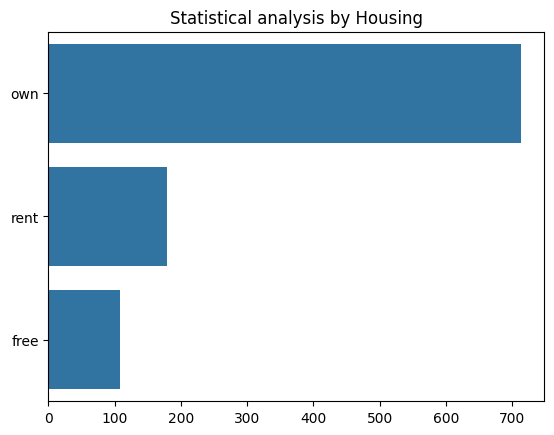

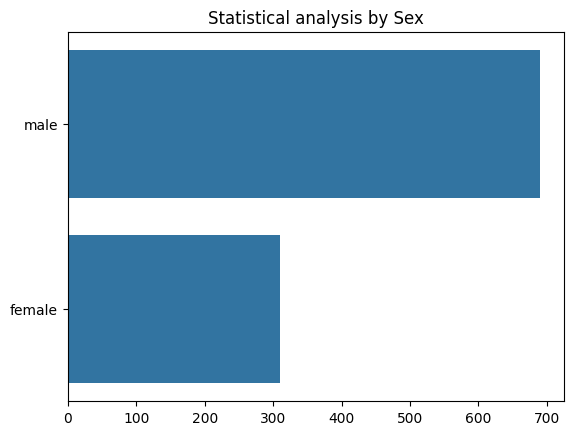

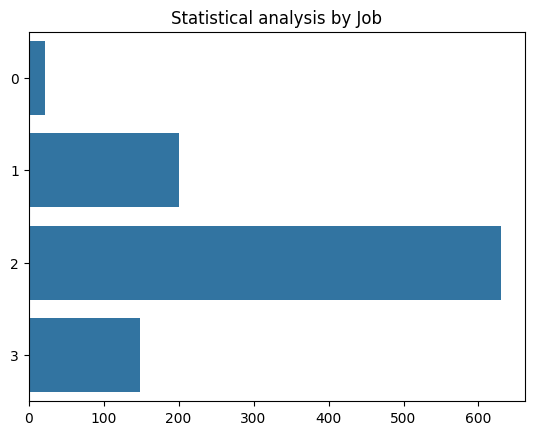

In [39]:
# cycle to plot distribution for each categorical column
for col in categorical_vars:
    plot_count_categories(dataset, col)

**This plot helps in visualizing the distribution of categorical data, showing which categories are most or least frequent.**

In [40]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

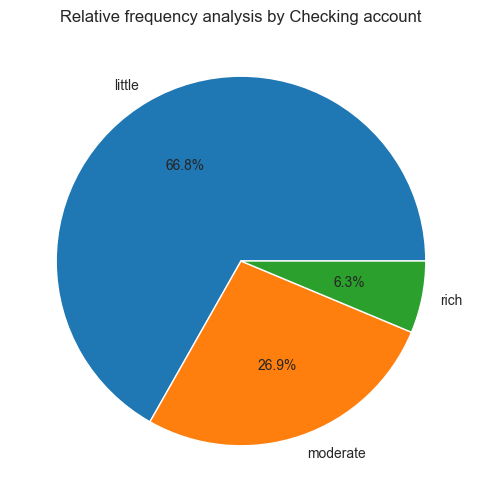

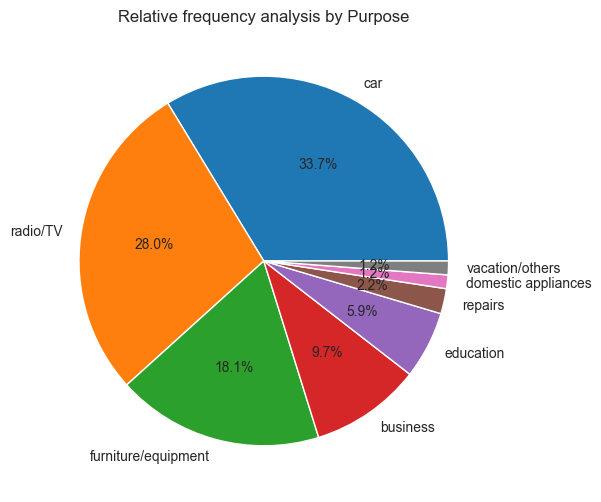

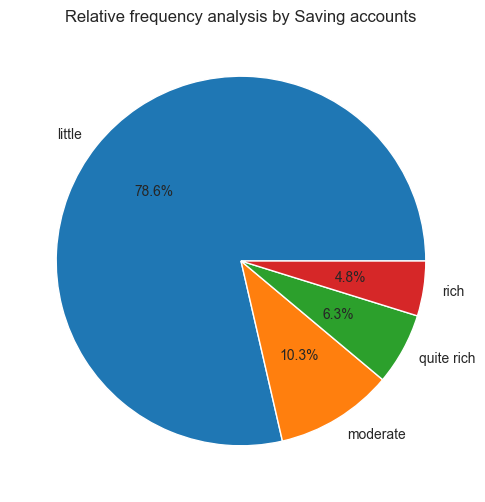

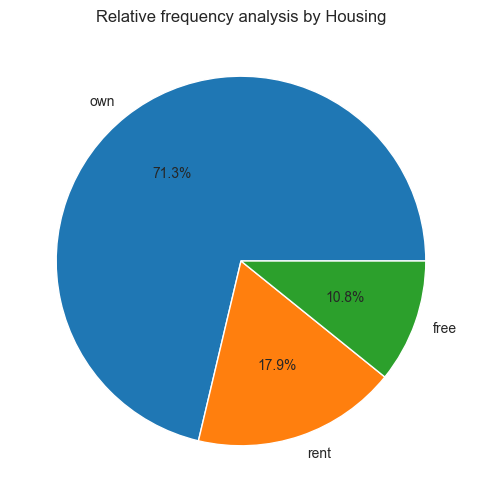

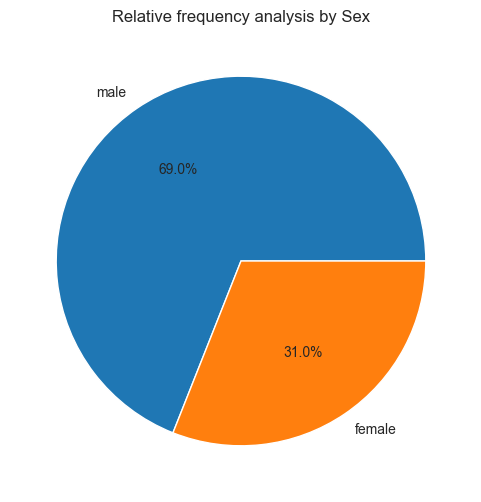

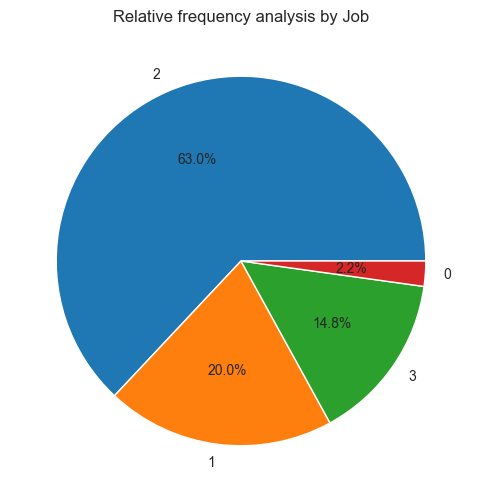

In [41]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

**The pie chart helps in understanding the proportion of different categories in the data.**

Description Statistical Analysis for Groups of Categorical Variables

In [57]:
# create groups organized by sex and income
group_team_season = dataset.groupby(["Sex", "Saving accounts"]).size().reset_index(name = "samples")
print(group_team_season)

      Sex Saving accounts  samples
0  female          little      243
1  female        moderate       32
2  female      quite rich       16
3  female            rich       19
4    male          little      543
5    male        moderate       71
6    male      quite rich       47
7    male            rich       29


In [58]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    plt.figure(figsize=(10, len(group[g1].unique()) * 3))
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Season')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Sex and Saving accounts')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()

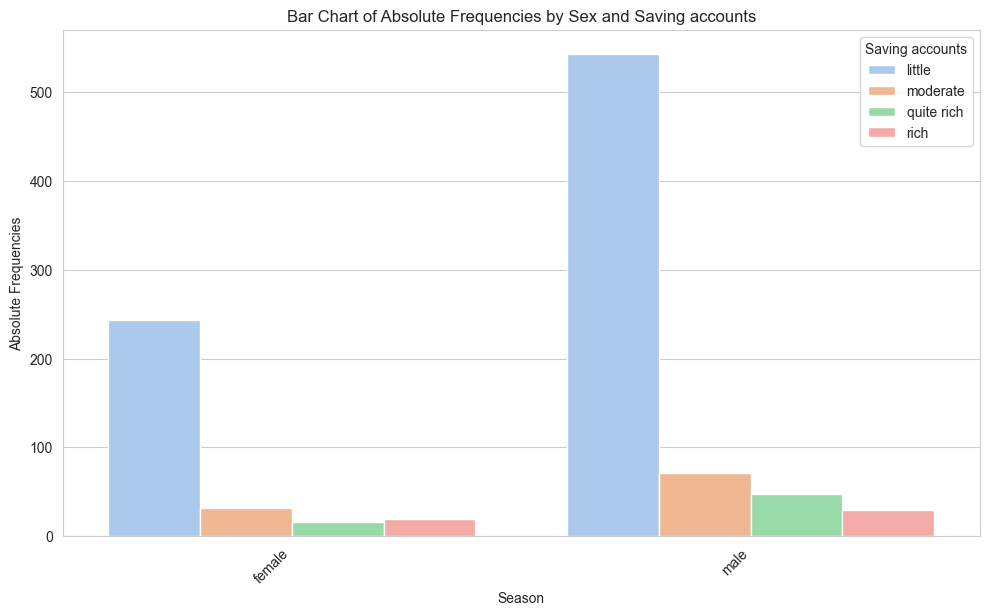

In [59]:
plot_absfreq_groups(group_team_season, "Sex", "Saving accounts")

**This plot helps to compare the frequency distribution of accounts for different genders**

In [69]:
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " Round " + group[g2]
    sizes = group["samples"]
    plt.figure(figsize=(15, 10)) # Увеличиваем размер фигуры
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by  Sex and Saving accounts')
    plt.show()

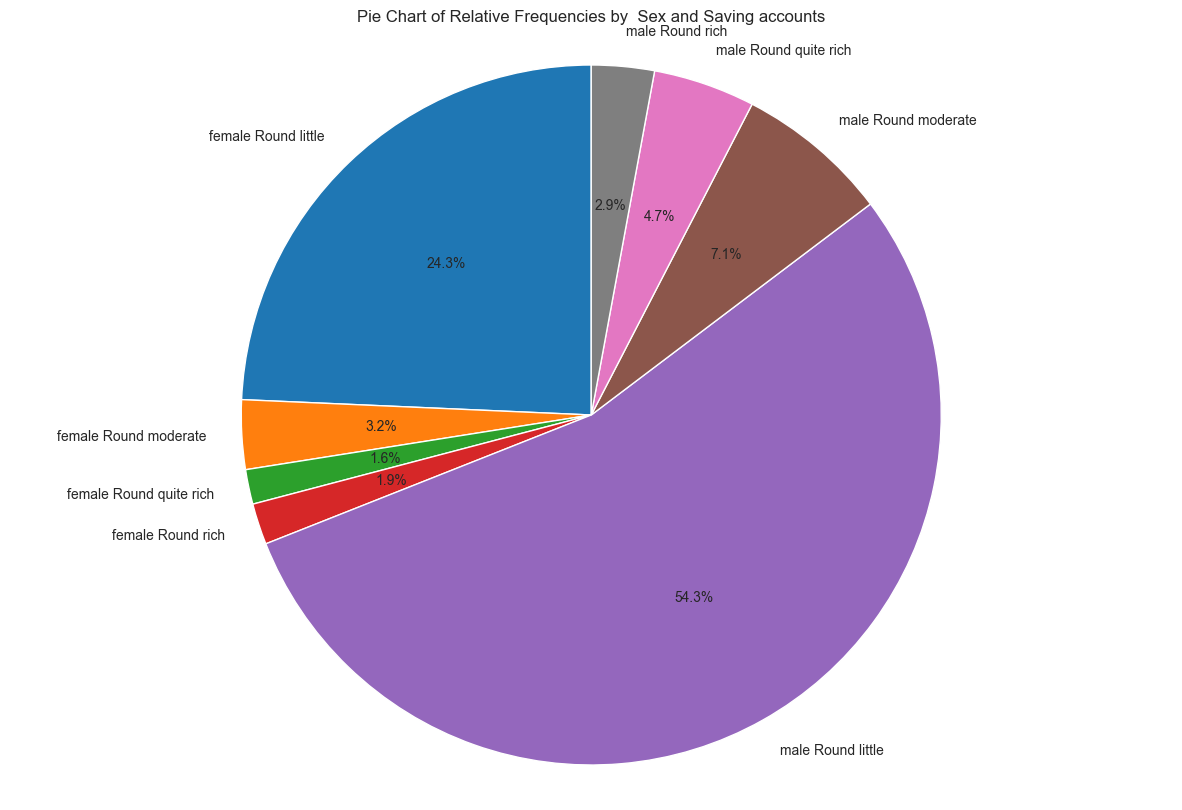

In [70]:
plot_relfreq_groups(group_team_season, "Sex", "Saving accounts")

**This plot helps to compare the frequency distribution of accounts for different genders**